<a href="https://colab.research.google.com/github/esephaneli/football-player-perf/blob/main/footballPlayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("players_data-2024_2025.csv")
df.head(25)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Yunis Abdelhamid,ma MAR,DF,Saint-Étienne,fr Ligue 1,36.0,1987.0,16,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,24.0,1999.0,32,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Mohamed Abdelmoneim,eg EGY,DF,Nice,fr Ligue 1,25.0,1999.0,12,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Ali Abdi,tn TUN,"DF,MF",Nice,fr Ligue 1,30.0,1993.0,25,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Saud Abdulhamid,sa KSA,DF,Roma,it Serie A,25.0,1999.0,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Columns: 267 entries, Rk to AvgDist
dtypes: float64(111), int64(121), object(35)
memory usage: 5.8+ MB


In [4]:
df.isnull().sum()

,0
Rk,0
Player,0
Nation,7
Pos,0
Squad,0
...,...
Stp,2642
Stp%,2643
#OPA,2642
#OPA/90,2642


In [5]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts',
       ...
       'Att (GK)', 'Thr', 'Launch%', 'AvgLen', 'Opp', 'Stp', 'Stp%', '#OPA',
       '#OPA/90', 'AvgDist'],
      dtype='object', length=267)

In [6]:
cols = [ "Age", "Min", "Gls", "Ast", "G+A", "xG", "xAG",
    "npxG", "npxG+xAG", "PrgC", "PrgP", "PrgR",
    "Sh", "SoT", "Cmp%", "Carries", "Touches"]

In [7]:
df_col = df[cols].copy()
df_col.head()

,Age,Min,Gls,Ast,G+A,xG,xAG,npxG,npxG+xAG,PrgC,PrgP,PrgR,Sh,SoT,Cmp%,Carries,Touches
0,24.0,86,0,0,0,0.0,0.0,0.0,0.0,1,8,3,0,0,79.4,41,73
1,24.0,120,0,0,0,0.0,0.0,0.0,0.0,0,6,10,0,0,71.2,46,85
2,21.0,65,0,0,0,0.1,0.0,0.1,0.1,3,2,3,1,0,58.6,13,36
3,20.0,88,0,0,0,0.1,0.0,0.1,0.1,3,4,1,1,0,78.3,29,65
4,18.0,3,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,100.0,1,4


In [8]:
df_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       2846 non-null   float64
 1   Min       2854 non-null   int64  
 2   Gls       2854 non-null   int64  
 3   Ast       2854 non-null   int64  
 4   G+A       2854 non-null   int64  
 5   xG        2854 non-null   float64
 6   xAG       2854 non-null   float64
 7   npxG      2854 non-null   float64
 8   npxG+xAG  2854 non-null   float64
 9   PrgC      2854 non-null   int64  
 10  PrgP      2854 non-null   int64  
 11  PrgR      2854 non-null   int64  
 12  Sh        2854 non-null   int64  
 13  SoT       2854 non-null   int64  
 14  Cmp%      2835 non-null   float64
 15  Carries   2854 non-null   int64  
 16  Touches   2854 non-null   int64  
dtypes: float64(6), int64(11)
memory usage: 379.2 KB


In [9]:
df_col["Age"] = df_col["Age"].fillna(df_col["Age"].mean())

In [10]:
df_col.isnull().sum()

,0
Age,0
Min,0
Gls,0
Ast,0
G+A,0
xG,0
xAG,0
npxG,0
npxG+xAG,0
PrgC,0


In [11]:
df_col["Cmp%"] = df.groupby("Pos")["Cmp%"].transform(lambda x: x.fillna(x.mean()))

In [12]:
df_col.isnull().sum()

,0
Age,0
Min,0
Gls,0
Ast,0
G+A,0
xG,0
xAG,0
npxG,0
npxG+xAG,0
PrgC,0


In [13]:
rename_cols = {     "Age": "age",
    "Min": "minutes_played",
    "Gls": "goals",
    "Ast": "assists",
    "G+A": "goal_assist_total",
    "xG": "expected_goals",
    "xAG": "expected_assists",
    "npxG": "non_penalty_xg",
    "npxG+xAG": "non_penalty_xg_plus_xag",
    "PrgC": "progressive_carries",
    "PrgP": "progressive_passes",
    "PrgR": "progressive_runs",
    "Sh": "shots",
    "SoT": "shots_on_target",
    "Cmp%": "pass_accuracy",
    "Carries": "carries",
    "Touches": "touches"
}
df_col = df_col.rename(columns=rename_cols)

In [14]:
df_col.columns

Index(['age', 'minutes_played', 'goals', 'assists', 'goal_assist_total',
       'expected_goals', 'expected_assists', 'non_penalty_xg',
       'non_penalty_xg_plus_xag', 'progressive_carries', 'progressive_passes',
       'progressive_runs', 'shots', 'shots_on_target', 'pass_accuracy',
       'carries', 'touches'],
      dtype='object')

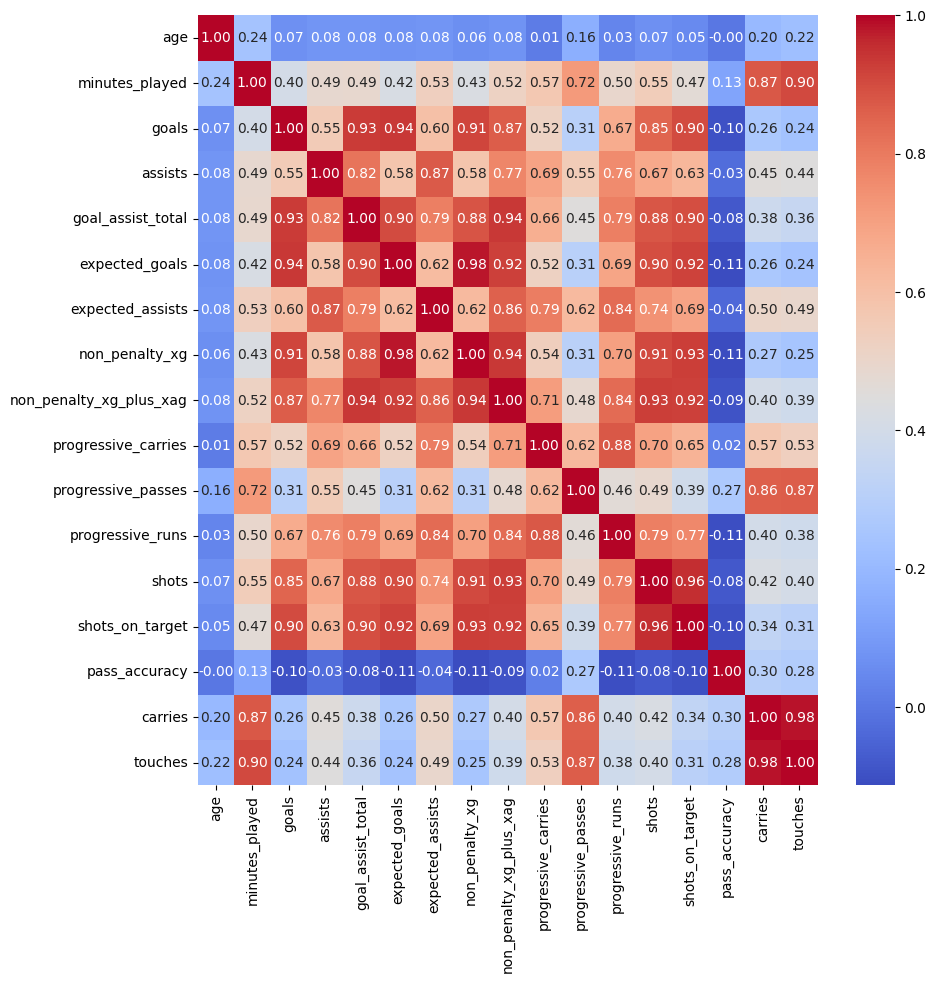

In [48]:
corr = df_col.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap="coolwarm",annot=True,fmt=".2f")
plt.show()

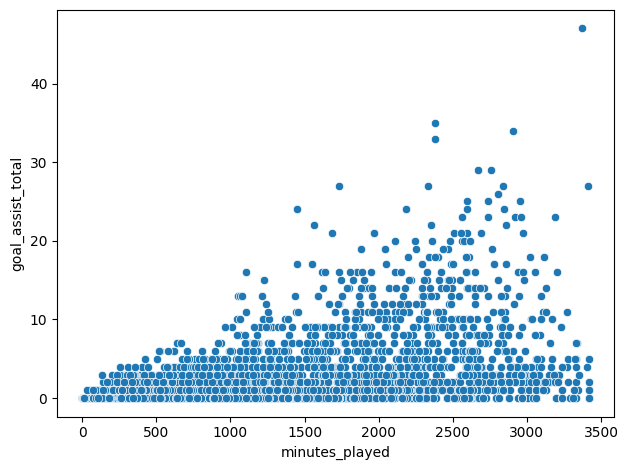

In [29]:
sns.scatterplot(data=df_col,x="minutes_played",y="goal_assist_total")
plt.tight_layout()
plt.show()

In [17]:
X = df_col.drop("goal_assist_total", axis=1)
y = df_col["goal_assist_total"]

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=.2, random_state=42)

Polynom Regression Model

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [23]:
mse

2.2756996533621025e-28

In [24]:
mae

1.1026011782914776e-14

In [25]:
r2

1.0

In [26]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=500)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge R²:", r2_score(y_test, y_pred_ridge))


Ridge R²: 0.9789299476275478


In [49]:
coefs = pd.Series(ridge.coef_, index=poly.get_feature_names_out(X.columns))

In [50]:
coefs.sort_values(ascending=False).head()

,0
goals,0.945015
assists,0.820030
expected_goals,0.426388
non_penalty_xg_plus_xag,0.370029
shots_on_target,0.365389


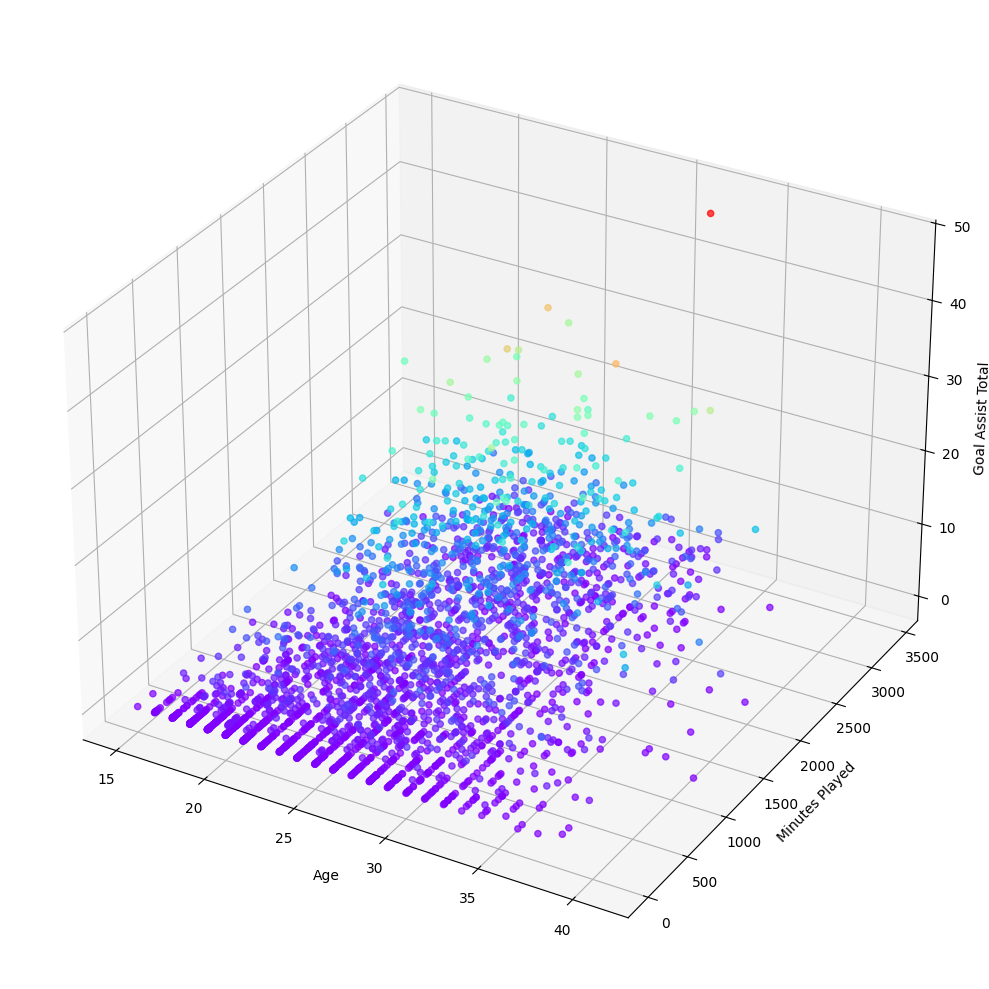

In [53]:
fig = plt.figure(figsize=(10,14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_col["age"], df_col["minutes_played"], df_col["goal_assist_total"],c=df_col["goal_assist_total"],cmap="rainbow", marker='o',alpha=0.7)
ax.set_xlabel("Age")
ax.set_ylabel("Minutes Played")
ax.set_zlabel("Goal Assist Total")
plt.tight_layout()
plt.show()